In [4]:
from datasets import load_dataset
from transformers import AutoTokenizer
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import textwrap

In [2]:

fertility_score= {}
models = {
    'RoBERTa-Medium-Amharic-Embed': './roberta-amharic-text-embedding-medium',
    'RoBERTa-Base-Amharic-Embed': './roberta-amharic-text-embedding-base',
    'BERT-Medium-Amharic-Embed': './bert-amharic-text-embedding-medium',
    'gte-multilingual-base': 'Alibaba-NLP/gte-multilingual-base',
    'multilingual-e5-large-instruct': 'intfloat/multilingual-e5-large-instruct',
    'snowflake-arctic-embed-l-v2.0': 'Snowflake/snowflake-arctic-embed-l-v2.0',
    'gte-modernbert-base': 'Alibaba-NLP/gte-modernbert-base',


}
for model in models:
    fertility= {}
    for i in ["amh"]:
        dataset = load_dataset("./amharic-retrieval-dataset-clean", split="train").shuffle(seed=42).select(range(10000))

        tokenizer = AutoTokenizer.from_pretrained(models[model])
        def calculate_subword_fertility(dataset, tokenizer, column_name="text"):
            subword_fertilities = []

            for sample in dataset:
                text = sample[column_name]

                subword_tokens = tokenizer.tokenize(text)

                original_words = text.split()

                fertility = len(subword_tokens) / len(original_words) if len(original_words) > 0 else 0
                subword_fertilities.append(fertility)

            average_fertility = np.mean(subword_fertilities)
            return average_fertility

        average_fertility = calculate_subword_fertility(dataset, tokenizer, column_name="passage")
        fertility[i] = round(average_fertility, 2)
        print(f"Average Subword Fertility: {fertility}")
    fertility_score[model] = fertility


Token indices sequence length is longer than the specified maximum sequence length for this model (995 > 510). Running this sequence through the model will result in indexing errors


Average Subword Fertility: {'amh': 1.46}


Token indices sequence length is longer than the specified maximum sequence length for this model (995 > 510). Running this sequence through the model will result in indexing errors


Average Subword Fertility: {'amh': 1.46}


Token indices sequence length is longer than the specified maximum sequence length for this model (1059 > 512). Running this sequence through the model will result in indexing errors


Average Subword Fertility: {'amh': 1.55}
Average Subword Fertility: {'amh': 2.35}


Token indices sequence length is longer than the specified maximum sequence length for this model (1573 > 512). Running this sequence through the model will result in indexing errors


Average Subword Fertility: {'amh': 2.35}
Average Subword Fertility: {'amh': 2.35}
Average Subword Fertility: {'amh': 13.8}


In [3]:

# Data
data = fertility_score

# Convert to DataFrame
df = pd.DataFrame(data).reset_index().melt(id_vars='index', var_name='Model', value_name='fertility')
df.columns = ['Language', 'Model', 'fertility']

df

,Language,Model,fertility
0,amh,RoBERTa-Medium-Amharic-Embed,1.46
1,amh,RoBERTa-Base-Amharic-Embed,1.46
2,amh,BERT-Medium-Amharic-Embed,1.55
3,amh,gte-multilingual-base,2.35
4,amh,multilingual-e5-large-instruct,2.35
5,amh,snowflake-arctic-embed-l-v2.0,2.35
6,amh,gte-modernbert-base,13.80


/tmp/ipykernel_2309809/495308764.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x='Model', y='fertility', data=df, palette=palette)
/tmp/ipykernel_2309809/495308764.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  bars.set_xticklabels(wrap_labels(labels, width=12), fontsize=12)  # Adjust font size here


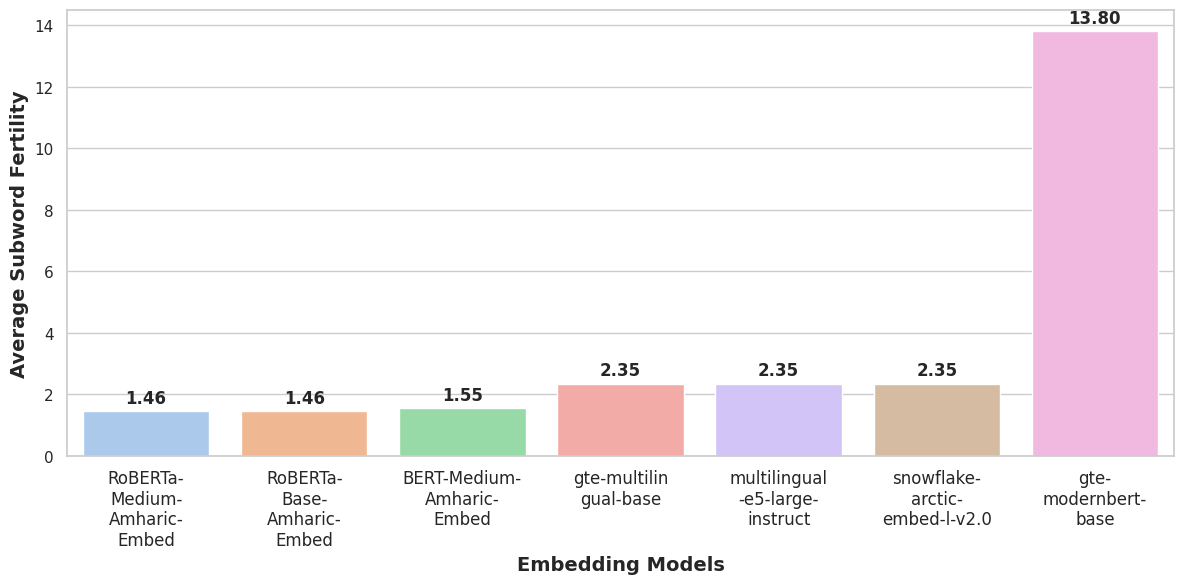

In [5]:

# Set Times New Roman font
plt.rcParams['font.family'] = 'Times New Roman'

# Set plot aesthetics
sns.set(style="whitegrid")

# Increase figure size for better spacing
plt.figure(figsize=(12, 6))

# Create the color palette
palette = sns.color_palette("pastel", len(df['Model'].unique()))

# Function to wrap text labels
def wrap_labels(labels, width=10):
    return ['\n'.join(textwrap.wrap(label, width)) for label in labels]

# Plot using barplot
bars = sns.barplot(x='Model', y='fertility', data=df, palette=palette)

# Get current x-axis labels and wrap them
labels = [item.get_text() for item in bars.get_xticklabels()]
bars.set_xticklabels(wrap_labels(labels, width=12), fontsize=12)  # Adjust font size here

# Add numbers on top of bars
for bar in bars.containers:
    bars.bar_label(bar, fmt="%.2f", fontsize=12, padding=3, fontweight="bold")

# Add labels
plt.xlabel('Embedding Models', fontsize=14, fontweight='bold')
plt.ylabel('Average Subword Fertility', fontsize=14, fontweight='bold')

# Adjust layout
plt.tight_layout()

# Save as high-quality PDF for LaTeX
plt.savefig('tokenizer_fertility.pdf', format='pdf', bbox_inches='tight', dpi=300)

# Show the plot
plt.show()
